## 01. 텐서만들기


In [1]:
# 임포트할 때 파이토치가 아니라 그냥 토치라고 써야 합니다.
import torch

Python 리스트를 PyTorch 텐서로 변환하려면 torch.tensor() 함수를 사용합니다.

In [2]:
data_list = [1,2]
tensor = torch.tensor(data_list)
tensor

tensor([1, 2])

In [3]:
type(tensor)

torch.Tensor

변환된 텐서는 리스트와 동일한 값을 가지며, tensor() 함수를 통해 PyTorch의 텐서 객체로 만들어집니다

생성한 텐서의 정보를 확인하려면 텐서 객체의 속성과 메서드를 사용할 수 있습니다.

In [4]:
print(f'data type: {tensor.dtype}')
print(f'num of dimensions: {tensor.ndim}')
print(f'shape: {tensor.shape}')
print(f'device: {tensor.device}')
print(f'requires_grad: {tensor.requires_grad}')

data type: torch.int64
num of dimensions: 1
shape: torch.Size([2])
device: cpu
requires_grad: False


shape 속성 외에도 size() 메서드를 사용하여 텐서의 형태를 확인할 수 있습니다.

In [5]:
print(f'size: {tensor.size()}')

size: torch.Size([2])


numpy 배열에서 텐서를 생성하는 세 가지 방법이 있습니다.

In [6]:
import numpy as np
# 방법 1 : torch.tensor()
data_np = np.array([
    [1,2],
    [3,4]
])

data_np

array([[1, 2],
       [3, 4]])

In [7]:
tensor_np = torch.tensor(data_np)
tensor_np

tensor([[1, 2],
        [3, 4]])

In [8]:
# 방법 2 : torch.from_numpy()
tensor_from_numpy = torch.from_numpy(data_np)
tensor_from_numpy

tensor([[1, 2],
        [3, 4]])

In [9]:
# 방법 3 : torch.as_tensor()
tensor_as_tensor = torch.as_tensor(data_np)
tensor_as_tensor

tensor([[1, 2],
        [3, 4]])

- torch.tensor : 넘파이 배열의 데이터를 복사하여 텐서 생성 -> 메모리 공유 X
- torch.from_numpy : 넘파이 배열과 메모리 공유 -> 원본 배열 변경 되면 텐서도 변경됨, 넘파이 배열만 입력으로 허용됨
- torch.as_tensor : 메모리 공유 O, 다른 파이썬 객체에도 사용가능

In [10]:
data_np[0,0] = -1

print(f'torch.tensor\n{tensor_np}')
print(f'torch.from_numpy\n{tensor_from_numpy}')
print(f'torch.as_tensor\n{tensor_as_tensor}')

torch.tensor
tensor([[1, 2],
        [3, 4]])
torch.from_numpy
tensor([[-1,  2],
        [ 3,  4]])
torch.as_tensor
tensor([[-1,  2],
        [ 3,  4]])


In [11]:
# torch_from_numpy2 = torch.from_numpy([[1,2],[3,4]])  # 넘파이가 아닌 리스트는 에러 남

In [12]:
a = [[1,2],[3,4]]  # 리스트

torch_as_tensor = torch.as_tensor(a)  # 리스트 넣어도 에러 안 남

a[0][0] = -1  # 하지만 numpy만 메모리 공유됨
torch_as_tensor

tensor([[1, 2],
        [3, 4]])

#### 데이터 타입 지정하기

PyTorch 텐서는 숫자로 구성된 다차원 배열이며, 텐서 내 모든 숫자는 동일한 데이터 타입을 가집니다. 기본 정수 타입은 torch.int64, 기본 실수 타입은 torch.float32입니다.

In [13]:
print(tensor.dtype)
print(tensor_np.dtype)

torch.int64
torch.int64


In [14]:
tensor = torch.tensor([1,1.8])
tensor.dtype

torch.float32

dtype 매개변수를 사용하여 텐서의 데이터 타입을 명시적으로 설정할 수 있습니다.

In [15]:
tensor = torch.tensor([1,2,3], dtype=torch.float16)
tensor.dtype

torch.float16

#### 데이터 타입 변환하기

`.to()` 메서드 사용하기 : to() 메서드는 PyTorch에서 가장 일반적으로 사용되는 방식입니다. 장치(Device) 전환과 데이터 타입 변경 모두에 사용 가능합니다.


In [16]:
# Float 텐서를 정수형으로 변환
tensor = torch.tensor([1.2, 3.4, 5.6], dtype=torch.float32)
int_tensor = tensor.to(torch.int32)
int_tensor.dtype

torch.int32

In [17]:
int_tensor

tensor([1, 3, 5], dtype=torch.int32)

In [18]:
int_tensor.device

device(type='cpu')

In [19]:
# 데이터 타입을 int로 변경하며 GPU로 이동
gpu_int_tensor = tensor.to(dtype=torch.int16, device='cuda')
print(gpu_int_tensor)

tensor([1, 3, 5], device='cuda:0', dtype=torch.int16)


 `.float()`, `.int()`, `.long()` 등 메서드 사용

PyTorch는 데이터 타입별로 빠르게 변환할 수 있는 메서드를 제공합니다.

In [20]:
# Float -> Int
int_tensor1 = tensor.int()
print(int_tensor1, int_tensor1.dtype)

# Float -> Long(64bit 정수형 데이터 // 큰 정수를 다룰 때 사용 // 인덱싱, 범주형 데이터 처리, 라벨 등)
long_tensor = tensor.long()
print(long_tensor, long_tensor.dtype)

# Float -> Double
double_tensor = tensor.double()
print(double_tensor, double_tensor.dtype)

# tensor([1, 3, 5], dtype=torch.int32)
# tensor([1, 3, 5], dtype=torch.int64)
# tensor([1.2000, 3.4000, 5.6000], dtype=torch.float64)


tensor([1, 3, 5], dtype=torch.int32) torch.int32
tensor([1, 3, 5]) torch.int64
tensor([1.2000, 3.4000, 5.6000], dtype=torch.float64) torch.float64


In [21]:
print(type(long_tensor[0]))
print(type(long_tensor[0].item()))

<class 'torch.Tensor'>
<class 'int'>


- **권장:** `.to(torch.<dtype>)` 방식.
- **빠르게 변환하려면:** `.float()`, `.int()`, `.long()` 등 사용.

데이터 타입을 변환할 때 `.to()` 메서드가 가장 유연하고 직관적입니다.

## 02. 특수한 텐서 생성 함수

PyTorch를 사용하다 보면 특수한 텐서를 만들어야 할 때가 생깁니다. 예를 들어 모든 값을 랜덤하게 초기화할 수도 있고요. 텐서의 모든 값을 0이나 1로 만들 때도 있죠. 이런 경우에 사용할 수 있는 함수를 몇 가지 살펴봅시다.

#### 랜덤한 값으로 만들기

랜덤한 값으로 텐서를 만드는 가장 대표적인 함수는 `rand()`입니다. 원하는 형태를 입력하면 0과 1 사이의 균등 분포를 바탕으로 난수 텐서가 만들어져요. 텐서 형태는 콤마로 숫자를 구분하여 입력해도 되고, 리스트나 튜플로 모아서 입력해도 됩니다.

In [22]:
# 난수 텐서
print(torch.rand(2,3))  # 균등분포
print(torch.rand([2,3]))
print(torch.rand((2,3)))

tensor([[0.8145, 0.2003, 0.8939],
        [0.3671, 0.5744, 0.3444]])
tensor([[0.4629, 0.3222, 0.2622],
        [0.2076, 0.6413, 0.0478]])
tensor([[0.3170, 0.4714, 0.4404],
        [0.8884, 0.5202, 0.4893]])


만약 min_val과 max_val 사이의 균등 분포에서 값을 추출하고 싶다면 이런 식으로 rand() 함수 결과를 변환해 주세요.



In [23]:
min_val, max_val = 5, 10
min_val + (max_val - min_val) * torch.rand(2,3)

tensor([[9.2207, 9.5433, 5.6017],
        [8.6399, 5.1522, 7.4347]])

또 다른 함수로는 randn()이 있습니다. 원하는 형태를 입력하면 평균이 0, 표준편차가 1인 표준 정규 분포를 바탕으로 난수 텐서가 만들어져요.


In [24]:
torch.randn(2,3)

tensor([[-1.3259, -0.8493, -0.3477],
        [-0.6723, -0.4961,  1.5826]])

만약 평균 mu,  표준편차 sigma인 정규 분포를 활용하고 싶다면 이런 식으로 randn() 함수 결과를 변환해야 합니다.



In [25]:
mu, sigma = 1, 10
mu + sigma * torch.randn(2,3)

tensor([[ 4.3562, -8.5918,  5.2304],
        [-1.4236,  1.9340, -1.3610]])

#### 특정한 값으로 만들기

zeros() 함수에 원하는 형태를 입력하면 값이 전부 0인 텐서를 만들 수 있습니다.



In [26]:
torch.zeros(2,3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [27]:
tensor1 = torch.randn(30,40)
torch.zeros_like(tensor1).size()

torch.Size([30, 40])

In [28]:
#ones
torch.ones(2,3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [29]:
torch.ones(2,3).dtype

torch.float32

그 외의 값을 원한다면 full() 함수에 원하는 형태를 리스트나 튜플로 입력하고, 이어서 어떤 값으로 텐서를 채울지도 입력하면 됩니다.

In [30]:
# full
torch.full((2,3),6)

tensor([[6, 6, 6],
        [6, 6, 6]])

In [31]:
torch.full((2,3),6).dtype

torch.int64

In [32]:
torch.ones(2,3)*6

tensor([[6., 6., 6.],
        [6., 6., 6.]])

### Quiz.
 파이썬 리스트 data_list와 NumPy array data_np가 주어져 있습니다. 이 두 데이터를 PyTorch 텐서로 만들어 주세요.

data_list에서 만든 텐서는 tensor_from_list 변수에 저장하고, data_np에서 만든 텐서는 tensor_from_np_array에 저장해야 합니다.

```
tensor([[ 1,  1],
        [-1, -1]])
tensor([[3, 4],
        [5, 6]])
```

In [33]:
import numpy as np
import torch

data_list = [
    [1, 1],
    [-1, -1],
]
data_np = np.array(
    [
        [3, 4],
        [5, 6]
    ]
)

# 여기에 코드를 작성하세요.
tensor_from_list = torch.tensor(data_list)
tensor_from_np_array = torch.tensor(data_np)

In [34]:
tensor_from_list

tensor([[ 1,  1],
        [-1, -1]])

In [35]:
tensor_from_np_array

tensor([[3, 4],
        [5, 6]])

## 03. 텐서의 변환과 연산

#### 텐서에서 NumPy 배열로 변환하기

PyTorch를 사용하다 보면 텐서를 NumPy 배열로 변환해야 할 때가 많습니다.

예를 들어, scikit-learn이나 pandas와 함께 사용하거나, matplotlib으로 시각화를 할 때 NumPy 배열이 유용하죠.

NumPy 배열은 디버깅할 때도 더 편리합니다.

텐서를 NumPy 배열로 변환하는 방법을 살펴보겠습니다.

In [36]:
import numpy as np
import torch

In [37]:
tensor = torch.ones(2,2)

numpy() 메서드를 사용하면 텐서를 NumPy 배열로 변환할 수 있습니다.

In [38]:
# 만약에 tensor가 cuda 메모리 위에 올라가 있을 때 cpu()로 메모리 위치를 이동
tensor.cpu()

tensor([[1., 1.],
        [1., 1.]])

In [39]:
np_array = tensor.numpy()
print(np_array)
print(type(np_array))

[[1. 1.]
 [1. 1.]]
<class 'numpy.ndarray'>


np.array() 함수에 텐서를 입력해도 동일한 결과를 얻을 수 있습니다.

In [40]:
np_array2 = np.array(tensor)
np_array2

C:\Users\amy\AppData\Local\Temp\ipykernel_36628\2454444564.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  np_array2 = np.array(tensor)


array([[1., 1.],
       [1., 1.]], dtype=float32)


텐서를 NumPy 배열로 변환할 때 메모리 공유 여부는 방법에 따라 달라집니다.

아래 코드를 통해 차이를 확인할 수 있습니다.

In [41]:
tensor[0,0] = -1

In [42]:
print(f'numpy()\n{np_array}')
print(f'np.array()\n{np_array2}')

numpy()
[[-1.  1.]
 [ 1.  1.]]
np.array()
[[1. 1.]
 [1. 1.]]


- `numpy()` 메서드: 텐서와 NumPy 배열이 메모리를 공유함.
- `np.array()`: 텐서의 데이터를 복사하여 새로운 NumPy 배열 생성.

#### Tensor의 연산

PyTorch에서는 텐서 간 다양한 연산을 지원합니다.

이 중 일부 대표적인 연산을 살펴보겠습니다.

In [43]:
a = torch.tensor([[1,2],
                  [3,4]])

b = torch.tensor([[1,1],
                  [2,2]])

같은 크기의 텐서 간 덧셈은 다음과 같이 수행합니다.

In [44]:
a + b

tensor([[2, 3],
        [5, 6]])

In [45]:
torch.add(a,b)

tensor([[2, 3],
        [5, 6]])

요소별 곱셈

In [46]:
a * b

tensor([[1, 2],
        [6, 8]])

In [47]:
torch.mul(a,b)

tensor([[1, 2],
        [6, 8]])

In [48]:
torch.multiply(a,b)

tensor([[1, 2],
        [6, 8]])

행렬 곱셈은 `matmul()` 함수를 사용합니다.

곱셈하려는 두 텐서의 차원이 적합해야 합니다.

In [49]:
a = torch.tensor(
    [
        [1,2],
        [3,4],
        [5,6],
        [7,8]
    ]
)

b = torch.tensor(
    [
        [1,0,0],
        [1,0,1],
        [0,1,1]
    ]
)

print(f'a의 열개수: {a.shape[1]}')
print(f'b의 행개수: {b.shape[0]}')

a의 열개수: 2
b의 행개수: 3


In [50]:
# torch.matmul(a,b)  # 행렬이 맞지 않음

In [51]:
a = torch.tensor(
    [
        [1,2],
        [3,4],
        [5,6],
        [7,8]
    ]
)

b = torch.tensor(
    [
        [1,0,0],
        [1,0,1],
    ]
)

print(f'a의 열개수: {a.shape[1]}')
print(f'b의 행개수: {b.shape[0]}')

a의 열개수: 2
b의 행개수: 2


In [52]:
torch.matmul(a,b)

tensor([[ 3,  0,  2],
        [ 7,  0,  4],
        [11,  0,  6],
        [15,  0,  8]])

In [53]:
# torch.matmul(b,a)  # 행렬곱이기 때문에 순서가 중요

In [54]:
a @ b

tensor([[ 3,  0,  2],
        [ 7,  0,  4],
        [11,  0,  6],
        [15,  0,  8]])

PyTorch는 두 텐서의 데이터 타입이 다르면 자동으로 데이터 타입을 일치시킵니다. 이 경우, 정수형 텐서가 실수형으로 변환되어 연산이 이루어집니다.


In [55]:
tensor_int = torch.tensor([1,2])
tensor_float = torch.tensor([3.,4.])
# tensor_float = torch.tensor([3,4], dtype=torch.float32)

print(tensor_int)
print(tensor_float)

add_result = tensor_int + tensor_float
mul_result = tensor_int + tensor_float

print(add_result)
print(mul_result)

tensor([1, 2])
tensor([3., 4.])
tensor([4., 6.])
tensor([4., 6.])


torch.matmul은 행렬 곱셈을 수행하지만, 두 텐서의 데이터 타입이 다를 경우 에러가 발생합니다.
따라서 정수형 텐서를 실수형 텐서로 변환해야 합니다.


In [ ]:
tensor_int = torch.tensor([1,2], dtype=torch.int32)
tensor_float = torch.tensor(
    [
        [3,1],
        [1,4]
    ],
    dtype=torch.float64
)

# torch.matmul(tensor_int, tensor_float)

RuntimeError: expected m1 and m2 to have the same dtype, but got: int != double

In [ ]:
tensor_int = torch.tensor([1,2], dtype=torch.float32)
tensor_float = torch.tensor(
    [
        [3,1],
        [1,4]
    ],
    dtype=torch.float32
)

torch.matmul(tensor_int, tensor_float)

tensor([5., 9.])

#### 텐서 인덱싱


1차원 텐서의 인덱싱은 넘파이와 동일합니다.

In [57]:
tensor = torch.tensor([3,4,5,6,7,10])

In [58]:
tensor[0]

tensor(3)

In [59]:
tensor[2].item()

5

In [60]:
tensor[-1]

tensor(10)

In [61]:
tensor[-2]

tensor(7)

In [62]:
tensor[::2]

tensor([3, 5, 7])

 2차원 텐서 인덱싱 및 슬라이싱

In [71]:
tensor_2d = torch.tensor(
    [
        [1,3,5,7,9],
        [2,4,6,8,10],
        [11,12,13,14,15]
    ]
)

In [72]:
tensor_2d[0,:3]

tensor([1, 3, 5])

In [73]:
tensor_2d[0,3:]

tensor([7, 9])

In [74]:
tensor_2d[0:3, 1:3]

tensor([[ 3,  5],
        [ 4,  6],
        [12, 13]])

## 브로드캐스팅

PyTorch에서 텐서 연산을 수행할 때, 두 텐서의 **shape**가 반드시 같을 필요는 없습니다.

셰이프가 다른 텐서 간 연산을 자동으로 처리해 주는 기능이 바로 **브로드캐스팅**입니다.

a는 2x3 형태의 2차원 텐서, **b**는 크기가 3인 1차원 텐서입니다.

이 두 텐서를 더하면 어떻게 될까요?

In [75]:
a = torch.tensor(
    [
        [1,2,3],
        [4,5,6]
    ]
)

b = torch.tensor(
    [1,-1,2]
)

print(a.shape)
print(b.shape)

torch.Size([2, 3])
torch.Size([3])


In [76]:
a + b

tensor([[2, 1, 5],
        [5, 4, 8]])

텐서 a의 각 행에 텐서 b가 자동으로 확장되어 덧셈 연산이 이루어졌습니다.

In [77]:
b_exp = torch.tensor(
    [
        [1,-1,2],
        [1,-1,2]
    ]
)

a + b_exp

tensor([[2, 1, 5],
        [5, 4, 8]])

#### 브로드캐스팅 동작원리

1. 크기가 1인 차원의 추가 : 차원 수가 적은 텐서는 차원 수가 많은 텐서와 맞추기 위해 **크기가 1인 차원**을 앞에 추가합니다.
2. 크기가 1인 차원의 확장 : 확장된 텐서에서 크기가 1인 차원은 상대 텐서에 맞춰 값이 복사됩니다.


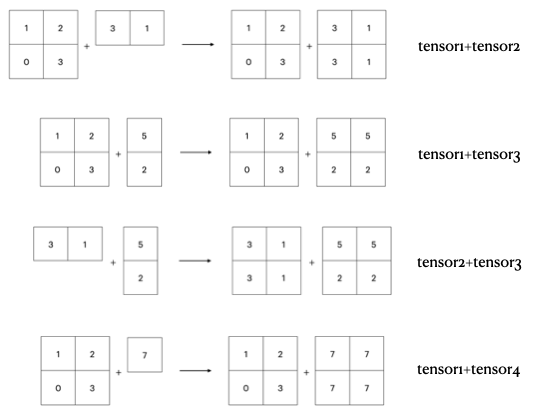

- 출처 : https://deeplearninguniversity.com/pytorch/pytorch-broadcasting/

In [78]:
a = torch.tensor(
    [
        [1,2,3],
        [4,5,6]
    ]
)

b = torch.tensor(
    [-1,1]
)

print(a.shape)
print(b.shape)

torch.Size([2, 3])
torch.Size([2])


In [ ]:
# a + b  # 확장하려는 dimension 에 맞지 않아서 에러

RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1

#### 브로드캐스팅이 불가능한 경우

브로드캐스팅은 모든 경우에 적용되는 것이 아닙니다.

셰이프가 서로 호환되지 않을 경우 연산이 불가능합니다.

#### Quiz.

- 실습 설명   
세 개의 텐서 tensor0, tensor1, tensor2가 주어져 있습니다. 다음 단계를 따라 코드를 작성해 주세요.

1. tensor0과 tensor1을 더합니다.
2. 1번 결과와 tensor2를 행렬곱합니다.
3. 2번 결과에서 첫 번째 열에는 2를 더하고, 두 번째 열에서는 2를 뺍니다.
4. 3번 결과를 NumPy array로 변환합니다. 이때 변수 이름은 final_np_array로 설정합니다.

- 실습 결과   
코드 마지막 부분에서 print() 함수로 출력한 결과가 아래처럼 나와야 합니다.

```
[[ 6 -6]
 [ 0  0]]
```

In [80]:
import numpy as np
import torch

tensor0 = torch.tensor(
    [
        [1, 1],
        [-1, -1]
    ]
)
tensor1 = torch.tensor(
    [
        [1, 1],
        [0, 0]
    ]
)
tensor2 = torch.tensor(
    [
        [1, -1],
        [1, -1]
    ]
)

# 여기에 코드를 작성하세요.
step1 = tensor0 + tensor1
step2 = torch.matmul(step1, tensor2)
step3 = step2 + torch.tensor([2, -2])
final_np_array = step3.numpy()

# 테스트 코드
print(final_np_array)

[[ 6 -6]
 [ 0  0]]


## 텐서의 형태 바꾸기

PyTorch를 사용하다 보면 텐서의 값은 그대로 유지하면서 형태를 바꿔야 하는 경우가 생깁니다.

예를 들어, 다차원 텐서를 1차원으로 펼치거나, 차원을 추가하거나, 불필요한 차원을 제거해야 할 때가 있습니다.

이 섹션에서는 이러한 작업을 도와주는 메소드들을 살펴보겠습니다.

#### reshape 메소드

reshape() 메소드는 텐서의 값을 그대로 두면서 형태를 변경할 수 있습니다.

In [82]:
x = torch.randn(3,4)
x

tensor([[-0.0087,  0.4958, -0.1504, -0.9799],
        [-0.1937,  0.1096,  1.8539, -0.6961],
        [ 0.3106,  1.2480,  1.1479, -1.1223]])

In [83]:
res0 = x.reshape(2,6)
res0

tensor([[-0.0087,  0.4958, -0.1504, -0.9799, -0.1937,  0.1096],
        [ 1.8539, -0.6961,  0.3106,  1.2480,  1.1479, -1.1223]])

원소 개수가 일치하지 않는 형태로 변환하려 하면 에러가 발생합니다.

In [ ]:
# x.reshape(2,5)

RuntimeError: shape '[2, 5]' is invalid for input of size 12

-1을 사용하면 나머지 차원의 크기를 PyTorch가 자동으로 계산합니다.

In [86]:
res1 = x.reshape(-1, 2, 3)
res1

tensor([[[-0.0087,  0.4958, -0.1504],
         [-0.9799, -0.1937,  0.1096]],

        [[ 1.8539, -0.6961,  0.3106],
         [ 1.2480,  1.1479, -1.1223]]])

In [87]:
 # 1차원으로 펼치기
x.reshape(-1)

tensor([-0.0087,  0.4958, -0.1504, -0.9799, -0.1937,  0.1096,  1.8539, -0.6961,
         0.3106,  1.2480,  1.1479, -1.1223])

#### `permute()`
permute() 메소드는 텐서의 형태를 자유롭게 바꾸는 것이 아니라 차원의 순서만 변경합니다.

In [88]:
x = torch.randn(2,3,4)
x

tensor([[[ 0.0867,  0.7020,  1.2935, -0.1818],
         [ 1.4085,  0.9800,  0.9160, -1.1988],
         [-0.2010,  1.3938,  1.4912, -0.7395]],

        [[-0.1479,  1.9649,  0.8322,  0.4118],
         [-1.1076,  0.8278, -0.3585, -2.9890],
         [ 0.1792, -0.2766,  1.2558, -0.0586]]])

In [91]:
x.size()

torch.Size([2, 3, 4])

In [ ]:
permuted = x.permute(2,0,1)  # 들어갈 순서로 적는다

In [90]:
permuted.size()

torch.Size([4, 2, 3])

#### `t()` 메소드

In [ ]:
x1 = torch.randn(2,3)
x2 = x1.t()  # 차원이 2차원 이하일 때만 transpose 할 수 있음
print(x1.size())
print(x2.size())

torch.Size([2, 3])
torch.Size([3, 2])


#### `squeeze()` 메소드

squeeze() 메소드는 크기가 1인 차원을 제거합니다.

In [93]:
x = torch.randn(1,28,1,28)

In [96]:
res0 = x.squeeze()
res0.size()

torch.Size([28, 28])

특정 차원만 제거하려면 차원의 인덱스를 입력합니다.

In [97]:
res1 = x.squeeze(2)
res1.size()

torch.Size([1, 28, 28])

#### `unsqueeze()` 메소드

unsqueeze() 메소드는 크기가 1인 차원을 추가합니다.

In [98]:
x = torch.randn(28,28)

In [99]:
res0 = x.unsqueeze(1)
res0.size()

torch.Size([28, 1, 28])

In [ ]:
res0 = x.unsqueeze(0)  # 주로 0 또는 -1 로 맨앞이나 맨뒤에 차원을 추가함
res0.size()

torch.Size([1, 28, 28])

## (심화) view() 메소드와 contiguous 개념

view() 메소드도 reshape() 메소드와 마찬가지로 전체 원소 개수를 유지하면서 텐서의 형태를 바꿀 때 사용합니다. 즉, 아래처럼 3x4 텐서가 있다고 하면, 원소 개수가 12개인 형태로 자유롭게 바꿀 수 있습니다.

In [101]:
x = torch.randn(3,4)
result = x.view(2,6)
result.size()

torch.Size([2, 6])

view() 메소드에서도 -1을 넣어 준 차원의 크기는 전체 원소 개수와 나머지 차원의 크기를 고려해 자동으로 지정됩니다.

In [102]:
result = x.view(-1,2,3)
result.size()

torch.Size([2, 2, 3])

In [103]:
x.view(-1)

tensor([-1.2475,  0.5482, -0.6006, -0.1375,  0.7531,  1.2243, -1.8678,  1.0350,
         0.1940, -0.7745, -0.5181, -0.8492])

view() 메소드로 나온 텐서는 원본 텐서와 메모리를 공유합니다. 아래 코드처럼 모든 값이 1인 텐서 x가 있고, view() 메소드로 형태를 바꾼 텐서 x_view가 있다고 해 볼게요.

In [105]:
x = torch.ones(2,3)
x_view = x.view(-1)

x[0,0] = 0 
print(x_view)
print(x)

tensor([0., 1., 1., 1., 1., 1.])
tensor([[0., 1., 1.],
        [1., 1., 1.]])


두 텐서가 메모리를 공유하기 때문에, 원본 텐서인 x에서 값을 바꾸면 x_view 역시 영향을 받게 됩니다.

#### Contiguous란?

`view()` 메소드처럼 메모리를 공유하면서 텐서 형태를 바꾸려면, 텐서 값이 연속된 메모리 공간에 존재해야 합니다. PyTorch에서는 연속된 메모리를 갖는 텐서를 contiguous하다고 표현해요. 즉, contiguous한 텐서에서만 `view()` 메소드를 사용할 수 있는 겁니다.

어떤 텐서가 contiguous한지 알아보려면 `is_contiguous()` 메소드를 확인해 보면 됩니다. `True`면 contiguous한 텐서인 거고, `False`면 contiguous하지 않은 텐서인 거죠.

In [110]:
x.is_contiguous()

True

실제로 PyTorch를 사용하다 보면 contiguous하지 않은 텐서가 만들어질 수 있습니다. 대표적으로 앞서 배운 permute() 메소드를 사용할 때가 있고요. 텐서를 슬라이싱하기만 해도 contiguous하지 않은 텐서가 나옵니다.

In [113]:
x = torch.ones(3, 16,28)
x_permuted = x.permute(2,1,0)
x_sliced = x[:,:,:10]

print(x.is_contiguous())
print(x_permuted.is_contiguous())
print(x_sliced.is_contiguous())

True
False
False


Contiguous하지 않은 텐서에서 view() 메소드를 사용하면 오류가 납니다. 그래서 아래처럼 contiguous() 메소드를 호출해서 먼저 contiguous한 텐서를 만들어 줘야 해요.

In [ ]:
# x_sliced.view()

TypeError: view() received an invalid combination of arguments - got (), but expected one of:
 * (torch.dtype dtype)
 * (tuple of ints size)


한편 `reshape()` 메소드는 `view()` 메소드와 달리, 텐서가 contiguous하지 않아도 정상적으로 코드가 실행됩니다. 만약 contiguous한 텐서에서 `reshape()` 메소드를 사용하면 `view()` 메소드처럼 원본 텐서와 메모리를 공유하는 텐서가 나오고요. Contiguous하지 않은 텐서에서 사용하면, 원본 텐서에서 데이터만 복사되어 새로운 메모리를 갖는 텐서가 나옵니다.

앞서 배웠듯이 `view()` 메소드는 텐서가 contiguous하지 않으면 오류가 납니다. 텐서가 반드시 contiguous하다고 보장할 수 있다면 `view()` 메소드를 써도 좋지만, 안정적인 실행을 위해서는 되도록 `reshape()` 메소드를 쓰는 게 낫습니다. 하지만 `reshape()` 메소드를 쓸 때도 상황에 따라 원본 텐서와 reshape된 텐서가 메모리를 공유할 수도 있고 그러지 않을 수도 있어요. 이를 잘 고려하여 코드를 작성해야겠죠.

#### `transpose()` 메소드

torch.transpose()를 이용하여 특정 dimension을 변경할 수 있습니다.

In [119]:
x1 = torch.FloatTensor(10,3,4,5)
print(x1.size())
print(torch.transpose(x1, 1,2).size())
print(torch.transpose(x1, 2,3).size())

torch.Size([10, 3, 4, 5])
torch.Size([10, 4, 3, 5])
torch.Size([10, 3, 5, 4])


## 여러 텐서 합치기

PyTorch를 사용하다 보면 여러 텐서를 하나로 합쳐야 하는 경우가 자주 있습니다.

이번 섹션에서는 이를 위한 두 가지 주요 함수, `cat()`과 `stack()`을 살펴보겠습니다.

#### `cat() 함수`

`cat()` 함수는 여러 텐서를 특정 차원에 따라 **이어 붙이는** 함수입니다.

이 과정을 **컨캐터네이트(concatenate)** 라고도 부릅니다.

In [125]:
x = torch.zeros(2,3)
y = torch.ones(2,3)
z = torch.ones(4,3)
print(x)
print(y)
print(z)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [126]:
cat0 = torch.cat([x,y], dim=0)
cat1 = torch.cat([x,y], dim=1)
cat2 = torch.cat([x,z], dim=0)

- **dim=0**: 텐서를 **행 방향**으로 붙입니다.
- **dim=1**: 텐서를 **열 방향**으로 붙입니다.

In [123]:
print(cat0)
print(cat0.size())

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([4, 3])


In [124]:
print(cat1)
print(cat1.size())

tensor([[0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.]])
torch.Size([2, 6])


In [127]:
print(cat2)
print(cat2.size())

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([6, 3])


- 조건: 이어 붙일 텐서의 크기 제한

기준 차원을 제외한 나머지 차원의 크기가 같아야 합니다.

In [ ]:
x = torch.zeros(2,3,3)
y = torch.ones(2,4,3)

torch.cat([x,y], dim=1)  # 기준 차원을 제외하고 모두 같아야지만 concat 가능

tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])

#### `stack()` 함수


`stack()` 함수는 여러 텐서를 특정 차원에 따라 **쌓는** 함수입니다.

`cat()` 함수와 달리, 결과 텐서에는 **새로운 차원**이 추가됩니다.

In [ ]:
# torch.stack([x,y], dim=1)
# torch.cat([x,y], dim=1)
# -> (2, (2, ?, 3))

RuntimeError: stack expects each tensor to be equal size, but got [2, 3, 3] at entry 0 and [2, 4, 3] at entry 1

- dim=0: 새로운 0번 차원이 추가됩니다.

In [131]:
x = torch.zeros(2,4,3)
y = torch.ones(2,4,3)

stack_result = torch.stack([x,y], dim=2)
cat_result = torch.cat([x,y], dim=2)

In [132]:
print(stack_result.size())
print(cat_result.size())

torch.Size([2, 4, 2, 3])
torch.Size([2, 4, 6])


-  조건: 합칠 텐서의 크기 제한

`stack()` 함수로 합칠 텐서는 반드시 크기가 같아야 합니다.

**dim** 값에 관계없이 동일한 형태의 텐서만 사용할 수 있습니다.

#### `cat()` vs `stack()` 요약

| 함수 | 차원 추가 여부 | 제한 사항 |
| --- | --- | --- |
| `cat` | 없음 | 기준 차원을 제외한 크기가 같아야 함 |
| `stack` | 있음 | 모든 차원의 크기가 같아야 함 |

## 한 텐서를 여러 텐서로 나누기

#### split()

In [133]:
x = torch.tensor(
    [
        [1,2,3,4,5],
        [6,7,8,9,10]
    ]
)

split() 메소드를 사용하면 텐서를 원하는 크기대로 나눌 수 있습니다. 메소드에 나누고 싶은 크기와 기준 차원을 입력해 주면 돼요. 나누어진 텐서들은 튜플로 묶여서 리턴됩니다. 아래 코드는 x를 0번 차원 기준으로 크기가 1이 되도록 나눕니다.

In [134]:
x.split(1, dim=0)

(tensor([[1, 2, 3, 4, 5]]), tensor([[ 6,  7,  8,  9, 10]]))

1번 차원 기준으로 크기가 2인 텐서가 되도록 나누면 어떻게 될까요?      
- x가 2x5 텐서이기 때문에 1번 차원 기준으로 5가 2로 나누어 떨어지지 않습니다.
- 이럴 때는 일단 지정한 크기대로 최대한 텐서를 만들어 본 뒤 마지막 텐서는 더 작은 크기로 만들게 됩니다. 따라서 2x2 텐서 두 개가 나오고 나머지 크기만큼 2x1 텐서 하나가 나오죠.
- 즉, 상황에 따라서 마지막 텐서는 크기가 지정한 것보다 더 작을 수도 있어요.

In [136]:
x.split(2, dim=1)

(tensor([[1, 2],
         [6, 7]]),
 tensor([[3, 4],
         [8, 9]]),
 tensor([[ 5],
         [10]]))

#### chunk() 메소드

`chunk()` 메소드로도 하나의 텐서를 여러 텐서로 나눌 수 있습니다. `split()`이 크기를 지정해서 텐서를 나눈다면, `chunk()`는 개수를 지정해서 텐서를 나누게 돼요. 메소드에 나누고 싶은 텐서의 개수와 기준 차원을 입력해 주면 됩니다. 나누어진 텐서들은 튜플로 묶여서 리턴됩니다.

위와 동일한 `x`가 있다고 했을 때, 아래 코드는 `x`를 0번 차원 기준으로 텐서 2개가 되도록 나눕니다. `x`가 2x5 텐서이기 때문에, 0번 차원으로는 텐서 두 개가 딱 떨어지게 나뉠 수 있어요.

In [137]:
x

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])

In [138]:
x.chunk(2, dim=0)

(tensor([[1, 2, 3, 4, 5]]), tensor([[ 6,  7,  8,  9, 10]]))

이번에는 1번 차원 기준으로 텐서를 셋으로 나눠 볼게요. x가 2x5 텐서니까 1번 차원 기준으로 텐서를 삼등분할 수는 없습니다. 이런 경우에는 일단 같은 크기로 텐서를 최대한 나누고, 마지막 텐서만 더 작은 크기를 갖게 됩니다. 결과를 보면 2x2 텐서 두 개에 2x1 텐서가 하나 나오죠.

In [140]:
x.chunk(3, dim=1)

(tensor([[1, 2],
         [6, 7]]),
 tensor([[3, 4],
         [8, 9]]),
 tensor([[ 5],
         [10]]))

만약 1번 차원 기준으로 텐서를 넷으로 나누면 어떻게 될까요? x가 2x5 텐서인데 1번 차원 기준으로 크기가 2인 텐서를 세 개만 만들어도 6이 되니까 5를 넘어 버립니다. 결국 이 경우에는 2x2 텐서가 두 개까지밖에 나오지 못하며, 여기에 2x1 텐서 하나가 함께 나오게 돼요. 텐서를 넷으로 나누려고 했는데 세 개만 나온 거죠. 이처럼 상황에 따라 지정한 개수보다 더 적은 수로 텐서가 나뉠 수도 있습니다.

In [142]:
x.chunk(4, dim=1)

(tensor([[1, 2],
         [6, 7]]),
 tensor([[3, 4],
         [8, 9]]),
 tensor([[ 5],
         [10]]))

즉,
- 주어진 차원(`dim`)의 텐서 크기가 지정된 `chunks`로 나누어 떨어지는 경우, 반환된 모든 조각(chunk)은 동일한 크기를 가집니다.
- 그러나 주어진 차원의 텐서 크기가 `chunks`로 나누어 떨어지지 않는 경우, 반환된 조각들 중 마지막 조각만 다른 크기를 가질 수 있습니다.
- 이러한 분할이 불가능한 경우, 반환되는 조각의 수는 지정된 `chunks`보다 적을 수 있습니다.

## GPU

In [143]:
import torch

딥 러닝 연산이라고 하면 굉장히 복잡할 것 같지만, 사실 앞서 살펴본 행렬 곱셈, 요소별 덧셈과 같은 행렬 연산이 대부분이에요. 딥 러닝 모델은 이런 기본적인 행렬 연산을 대규모로 여러 번 반복하여 복잡한 패턴을 학습하고 예측하게 됩니다.

GPU는 이런 대규모 행렬 연산을 빠르고 효율적으로 처리할 수 있는 장치예요. 그래서 딥 러닝의 발전을 이야기할 때면 GPU가 빠지지 않고 등장합니다.

PyTorch에서는 연산 장치를 명시적으로 설정하지 않으면 텐서를 기본적으로 CPU에 만들어요.

Colab에서 GPU 환경을 활성화한 상태로 텐서를 만든 뒤, 이 텐서가 어떤 장치에서 만들어졌는지 확인해 봅시다. 텐서 객체의 device 속성을 확인하면 돼요. GPU를 사용할 수 있는 환경임에도 텐서는 CPU에 만들어집니다.

In [150]:
tensor = torch.tensor([1,2])
print(tensor.device)

cpu


GPU를 사용할 수 있는 환경이라면 CPU에 있는 텐서를 GPU로 옮길 수 있습니다. CPU에 있는 텐서를 GPU에 옮기기 전에, 우선 GPU를 사용할 수 있는 환경인지 먼저 체크해 주는 게 좋은데요.

아래처럼 코드를 작성하고 실행해 보세요. 결과가 True면 GPU를 사용할 수 있고, False면 GPU를 사용할 수 없습니다.

In [151]:
torch.cuda.is_available()

True

CPU에 있는 텐서를 GPU로 옮길 때는 텐서의 `to()` 메소드를 이용하면 됩니다. 텐서의 데이터 타입을 바꿀 때 사용했던 메소드와 같은 메소드예요. `device` 속성을 확인했을 때 cuda라는 표시와 함께 숫자가 나오면 텐서가 GPU에 있다는 뜻입니다. 여기서 숫자 0은 GPU의 인덱스를 나타냅니다.

In [153]:
if torch.cuda.is_available():
    tensor_gpu = tensor.to('cuda')
print(tensor_gpu.device)

cuda:0


to() 메소드 대신 cuda() 메소드를 사용해도 됩니다. 다만 CPU에서 GPU로 텐서를 옮길 때에는 to() 메소드가 더 많이 사용되는 편입니다.

In [ ]:
if torch.cuda.is_available():
    tensor_gpu = tensor.cuda()  # gpu 없으면 에러나서 잘 안씀
print(tensor_gpu.device)

cuda:0


여러 대의 GPU를 사용할 수 있는 환경이라면 인덱스가 0, 1, 2, 3, … 이렇게 커지면서 서로 다른 GPU를 가리킬 수 있습니다. 예를 들어 GPU가 2대라면 아래처럼 0번 GPU와 1번 GPU에 각각 텐서를 옮길 수 있어요.

In [ ]:
tensor_gpu0 = tensor.to('cuda:0')
# tensor_gpu1 = tensor.to('cuda:1')  # 없기 때문에 에러남

RuntimeError: CUDA error: invalid device ordinal
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


만약 GPU를 사용할 수 없는 환경에서 텐서를 GPU로 옮기려고 하면 다음과 같은 오류가 발생합니다.

In [ ]:
# RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

#### GPU에 있는 텐서를 CPU로 옮기기

그런데 PyTorch를 사용하다 보면 GPU에 있는 텐서를 CPU로 옮겨야 할 때도 많습니다. 예를 들어 텐서를 NumPy array로 바꿔야 할 때, GPU 메모리를 효율적으로 관리해야 할 때 등이 그렇죠.

GPU에 있는 텐서를 CPU로 옮길 때도 `to()` 메소드를 사용하면 됩니다.

In [157]:
tensor_cpu = tensor_gpu.to('cpu')
print(tensor_cpu)

tensor([1, 2])


In [158]:
# 또는 cpu() 메소드를 사용해도 같은 결과가 나옵니다. 참고로 GPU 텐서를 CPU로 옮길 때에는 to() 메소드보다 cpu() 메소드가 더 많이 쓰이는 편이에요.

In [161]:
tensor_cpu = tensor_gpu.cpu()
print(tensor_cpu.device)

cpu


#### `torch.device`로 장치 관리하기

PyTorch에서 제공하는 `device` 객체를 활용하면 장치를 보다 편하게 관리할 수 있습니다. 이런 식으로 `torch.device()`에 원하는 장치를 입력해 `device` 객체를 만들 수 있어요.

In [162]:
deveice_cpu = torch.device('cpu')
deveice_gpu = torch.device('cuda')

아래처럼 torch.cuda.is_available()에 따라 장치가 결정되도록 device 객체를 만드는 경우가 많습니다. 이 코드는 앞으로도 자주 나오니까 꼭 기억해 주세요.

In [163]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

한번 device 객체를 만들어 놓으면 이후에는 문자열이 아니라 객체를 사용해 텐서의 장치를 설정하면 됩니다. to() 메소드를 쓸 때에는 메소드 입력으로 device 객체를 넣어 주고, 텐서를 만들면서 device 파라미터를 쓸 때는 파라미터에 device 객체를 입력해 주세요.

In [164]:
tensor = torch.tensor([1,2,3]).to(device)
print(tensor)
tensor = torch.tensor([1,2,3], device=deveice_cpu)
print(tensor)

tensor([1, 2, 3], device='cuda:0')
tensor([1, 2, 3])


#### 텐서 연산 시 주의할 점

텐서와 텐서가 어떤 연산을 할 때 두 텐서의 연산 장치는 동일해야 합니다. 그러니까 CPU에 있는 텐서끼리만 연산이 가능하고, 동일한 GPU에 있는 텐서끼리만 연산이 가능해요.

아래 코드는 CPU 텐서와 GPU 텐서를 더해 주는 코드입니다.

In [167]:
tensor_cpu = torch.ones(1,4, device=device)
tensor_gpu = torch.zeros(1,4, device=device)

a = tensor_cpu + tensor_gpu
a.device
a.detach().cpu().numpy()

array([[1., 1., 1., 1.]], dtype=float32)

실행하면 아래와 같이 텐서의 연산 장치가 다르다는 오류가 발생합니다.